In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('../Data/Kaggle Dataset/housing_price_dataset.csv')
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [4]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


C:\Users\ArnabBiswas\anaconda3\envs\mlenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


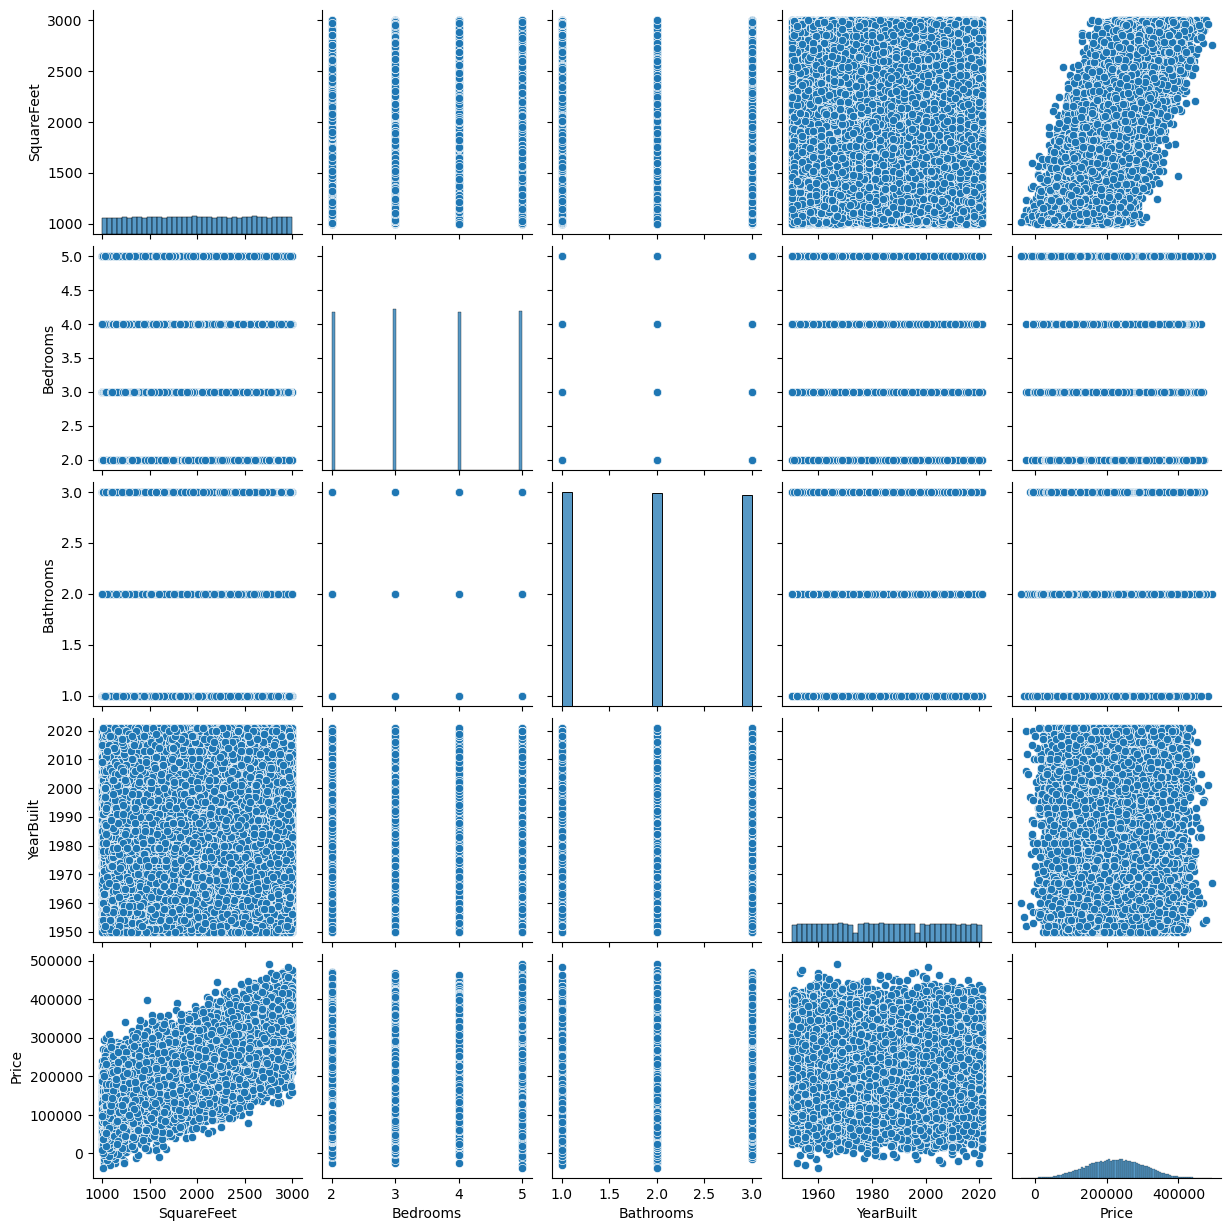

In [5]:
sns.pairplot(df)

C:\Users\ArnabBiswas\AppData\Local\Temp\ipykernel_6904\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

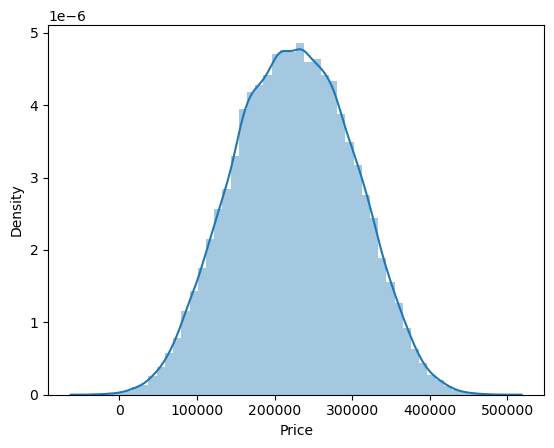

In [6]:
sns.distplot(df['Price'])

In [8]:
X = df.drop('Neighborhood', axis=1)
X.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
0,2126,4,1,1969,215355.283618
1,2459,3,2,1980,195014.221626
2,1860,2,1,1970,306891.012076
3,2294,2,1,1996,206786.787153
4,2130,5,2,2001,272436.239065


In [10]:
min_max_scaler = MinMaxScaler()
X['YearBuilt'] = min_max_scaler.fit_transform(X[['YearBuilt']])

<Axes: >

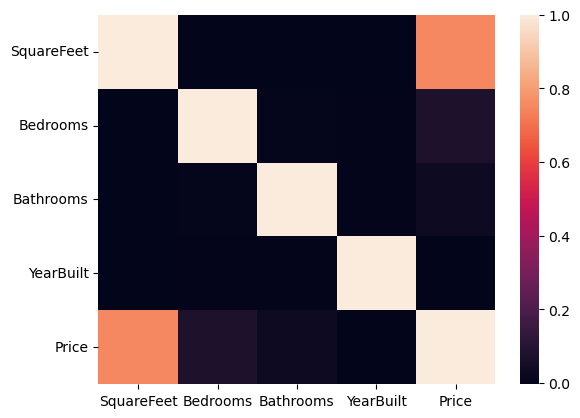

In [11]:
sns.heatmap(X.corr())

In [12]:
# Let us now convert the Categorical variable and make it usable in Regression

from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
df['Neighborhood'] = labelencoder.fit_transform(df['Neighborhood']) 

In [14]:
df['YearBuilt'] = min_max_scaler.fit_transform(df[['YearBuilt']])

In [15]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,0.267606,215355.283618
1,2459,3,2,0,0.422535,195014.221626
2,1860,2,1,1,0.281690,306891.012076
3,2294,2,1,2,0.647887,206786.787153
4,2130,5,2,1,0.718310,272436.239065


In [19]:
X = df[df.columns[df.columns!='Price'] ]
y = df['Price']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
lr.coef_

array([  99.34928151, 5231.69331804, 2966.04498451,  707.54051716,
       -415.79256749])

In [32]:
lr.intercept_

754.4061853627791

In [33]:
pred = lr.predict(X_test)

In [34]:
pred

array([217900.05111544, 135891.04800906, 256131.64101086, ...,
       310243.64731264, 200471.18506779, 243602.73150451])

In [35]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 39433.36167012688
MSE: 2437053699.886403
RMSE: 49366.52408147046


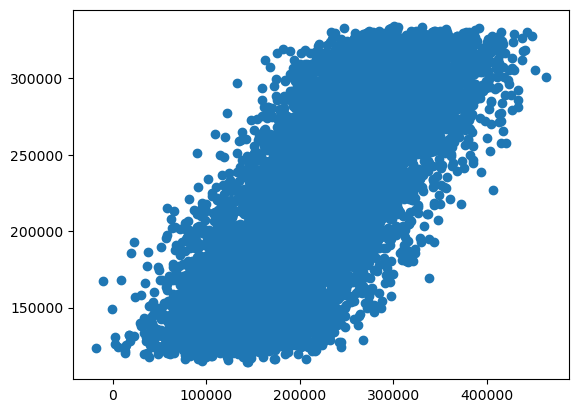

In [36]:
plt.scatter(y_test,pred)